# Business Understanding


This sample data set provides "a sneak peek into the Airbnb activity in Seattle, WA, USA".

An overview of the business context is provided on the Kaggle web page [here](https://www.kaggle.com/airbnb/seattle/home).

The business questions we seek to answer in this project are as follows:

- What are the five most expensive neighbourhoods in Seattle for Airbnb?
- What is the most expensive time of year to visit Seattle?
- What factors can influence the price of an Airbnb listing?

# Data Understanding

There are three data files in this data set:
- **Listings** - including full descriptions and average review score
- **Calendar** - including listing id and the price and availability for that day
- **Reviews** - including unique id for each reviewer and detailed comments

The metadata for these files is provided on the Kaggle web page [here](https://www.kaggle.com/airbnb/seattle).

We will only need the Listings and Calendar files for the purposes of this project.

# Data Preparation - Gather Data

In [12]:
# Import all libraries and define settings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [2]:
# Read in data from the Listings and Calendar files
# Date needs to be indicated explicitly so an appropriate data type is set

df_listings = pd.read_csv('./listings.csv')
df_calendar = pd.read_csv('./calendar.csv', parse_dates=['date'])

# Data Preparation - Assess Data #

In [3]:
# Browse a sample of data in Listings
df_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [4]:
# Review distributions of numeric fields in Listings
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [5]:
# Look at initial data types for each column in Listings
df_listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [6]:
# Look at percent of missing data in each column in Listings
100*df_listings.isnull().sum()/len(df_listings)

id                                    0.000000
listing_url                           0.000000
scrape_id                             0.000000
last_scraped                          0.000000
name                                  0.000000
summary                               4.635935
space                                14.903091
description                           0.000000
experiences_offered                   0.000000
neighborhood_overview                27.029859
notes                                42.063908
transit                              24.463070
thumbnail_url                         8.381351
medium_url                            8.381351
picture_url                           0.000000
xl_picture_url                        8.381351
host_id                               0.000000
host_url                              0.000000
host_name                             0.052383
host_since                            0.052383
host_location                         0.209534
host_about   

In [7]:
# Browse a sample of data in Calendar
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [8]:
# Look at initial data types for each column in Calendar
df_calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

In [9]:
# Look at percent of missing data in each column in Calendar
100*df_calendar.isnull().sum()/len(df_calendar)

listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
dtype: float64

# Data Preparation - Clean and Transform #

In [17]:
# Select a sample of interesting attributes for our analysis.
df_listings = df_listings[['accommodates', 'host_response_rate', 'host_acceptance_rate',\
        'latitude', 'longitude', 'host_is_superhost', 'host_listings_count', 
        'review_scores_rating', 'neighbourhood_group_cleansed', 'price']]

df_listings.head()

,accommodates,host_response_rate,host_acceptance_rate,latitude,longitude,host_is_superhost,host_listings_count,review_scores_rating,neighbourhood_group_cleansed,price
0,4,96%,100%,47.636289,-122.371025,f,3.0,95.0,Queen Anne,$85.00
1,4,98%,100%,47.639123,-122.365666,t,6.0,96.0,Queen Anne,$150.00
2,11,67%,100%,47.629724,-122.369483,f,2.0,97.0,Queen Anne,$975.00
3,3,NaN,NaN,47.638473,-122.369279,f,1.0,NaN,Queen Anne,$100.00
4,6,100%,NaN,47.632918,-122.372471,f,2.0,92.0,Queen Anne,$450.00


In [18]:
# Price fields need '$' and ',' characters removed so they become numeric
df_listings['price'] = pd.to_numeric(df_listings['price'].str.replace('$','').str.replace(',',''))
df_calendar['price'] = pd.to_numeric(df_calendar['price'].str.replace('$','').str.replace(',',''))

# Transform superhost attribute from t/f values to 1/0
df_listings['superhost'] = df_listings['host_is_superhost'].apply(lambda x: 1 if x=='t' else 0)
df_listings .drop(axis=1, inplace=True, labels='host_is_superhost')

# Remove unwanted '%' character from rate attributes
df_listings['host_response_rate'] = df_listings['host_response_rate'].str.replace('%','')
df_listings['host_acceptance_rate'] = df_listings['host_acceptance_rate'].str.replace('%','')

df_listings.head()

,accommodates,host_response_rate,host_acceptance_rate,latitude,longitude,host_listings_count,review_scores_rating,neighbourhood_group_cleansed,price,superhost
0,4,96,100,47.636289,-122.371025,3.0,95.0,Queen Anne,85.0,0
1,4,98,100,47.639123,-122.365666,6.0,96.0,Queen Anne,150.0,1
2,11,67,100,47.629724,-122.369483,2.0,97.0,Queen Anne,975.0,0
3,3,NaN,NaN,47.638473,-122.369279,1.0,NaN,Queen Anne,100.0,0
4,6,100,NaN,47.632918,-122.372471,2.0,92.0,Queen Anne,450.0,0


In [19]:
# Look at percent of missing data in each column in Listings
100*df_listings.isnull().sum()/len(df_listings)

accommodates                     0.000000
host_response_rate              13.698271
host_acceptance_rate            20.246202
latitude                         0.000000
longitude                        0.000000
host_listings_count              0.052383
review_scores_rating            16.946045
neighbourhood_group_cleansed     0.000000
price                            0.000000
superhost                        0.000000
dtype: float64

In [27]:
# Impute all missing values in four columns with mean values.
# Means we don't through away any information.
imp = Imputer(missing_values=np.nan, strategy='mean')

df_listings[['host_response_rate', 'host_acceptance_rate', 'review_scores_rating', 'host_listings_count']] = \
    imp.fit_transform(df_listings[['host_response_rate', 'host_acceptance_rate', 'review_scores_rating', 'host_listings_count']])

df_listings.head()

,accommodates,host_response_rate,host_acceptance_rate,latitude,longitude,host_listings_count,review_scores_rating,neighbourhood_group_cleansed,price,superhost
0,4,96.000000,100.000000,47.636289,-122.371025,3.0,95.000000,Queen Anne,85.0,0
1,4,98.000000,100.000000,47.639123,-122.365666,6.0,96.000000,Queen Anne,150.0,1
2,11,67.000000,100.000000,47.629724,-122.369483,2.0,97.000000,Queen Anne,975.0,0
3,3,94.886798,99.967159,47.638473,-122.369279,1.0,94.539262,Queen Anne,100.0,0
4,6,100.000000,99.967159,47.632918,-122.372471,2.0,92.000000,Queen Anne,450.0,0


In [28]:
# Look at percent of missing data in each column in Listings
# Confirms all missing values now populated
100*df_listings.isnull().sum()/len(df_listings)

accommodates                    0.0
host_response_rate              0.0
host_acceptance_rate            0.0
latitude                        0.0
longitude                       0.0
host_listings_count             0.0
review_scores_rating            0.0
neighbourhood_group_cleansed    0.0
price                           0.0
superhost                       0.0
dtype: float64

In [29]:
# Remove all Calendar records where price (our target value of interest) not specified
df_calendar.dropna(axis=0, subset=['price'], inplace=True)

# Look again at percent of missing data in each column in Calendar as a check
100*df_calendar.isnull().sum()/len(df_calendar)

listing_id    0.0
date          0.0
available     0.0
price         0.0
dtype: float64

In [31]:
# Create an aggregate data frame showing average listing price for each date
# This will enable us to analyze distribution of price by date
df_avg_price_by_date = pd.DataFrame(df_calendar.groupby('date')['price'].mean())

# Evaluate - Business Question 1 #
What are the five most expensive neighborhoods in Seattle for Airbnb?

In [32]:
# Business Question #1
# 
df_listings.groupby(by='neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False).head(5)

neighbourhood_group_cleansed
Magnolia        177.672131
Queen Anne      157.223729
Downtown        154.405660
West Seattle    141.359606
Cascade         140.101124
Name: price, dtype: float64

# Evaluate - Business Question 2 #
What is the most expensive time of year to visit Seattle?

Text(0.5,0,'')

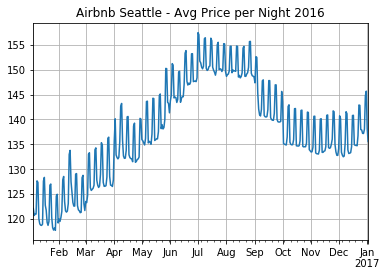

In [33]:
ax = df_avg_price_by_date.plot( \
    kind='line', legend=False, grid=True, title='Airbnb Seattle - Avg Price per Night 2016')
ax.set_xlabel('')

Text(0.5,0,'')

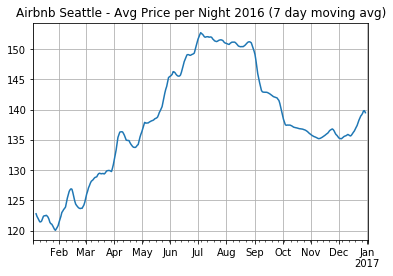

In [34]:
# Above plot is distorted by weekday variance, so let's look at 7-day moving average instead
# We center the label in the middle of each 7 day window
ax2 = df_avg_price_by_date.rolling(window=7, center=True).mean().plot(kind='line', legend=False, grid=True, \
    title='Airbnb Seattle - Avg Price per Night 2016 (7 day moving avg)')
ax2.set_xlabel('')

In [35]:
# Find most expensive date in the year
df_avg_price_by_date.sort_values(by='price', ascending=False).head(1)

,price
date,
2016-07-01,157.48


# Evaluate - Business Question 3 #
What factors can influence the price of an Airbnb listing?

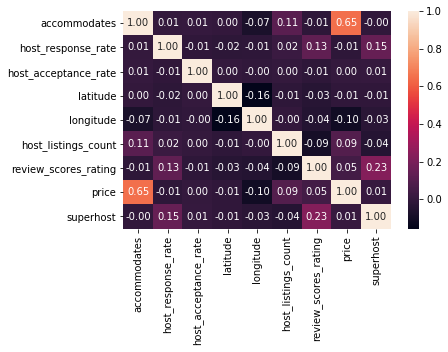

In [36]:
# Drop neighbourhood column as no longer needed
df_listings.drop(axis=1, labels='neighbourhood_group_cleansed', inplace=True)

# Use a scaler to normalise the features to remove bias due to default value ranges
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df_listings), columns=df_listings.columns)

# Create a heatmap to see how price moves with other features
sns.heatmap(df_scaled.corr(), annot=True, fmt="0.2f")

Observations from the subset of features we have selected for our analysis:
- The number of people a property can accommodate is the most influential factor on price.
- Secondary to this, a host with a higher number of listings will tend to have a higher price. We could speculate that these hosts are management companies who focus on higher value properties or whose commission pushes up the price.
- Another secondary factor is longitude with a negative correlation. As longitude decreases as you go west, this would suggest that properties located more westerly (closer to the sea) tend to have higher prices.
- Other factors have lower correlations and likely to be less influential.